<a href="https://colab.research.google.com/github/KethelynJS/DataScience/blob/main/Segunda_terceira_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segunda e Terceira entrega**



In [2]:
from google.colab import files

uploaded = files.upload()


Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Carregando os dados
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

# Visualizando as primeiras linhas de cada DataFrame
print("Orders:")
print(orders.head())
print("\nOrder Items:")
print(order_items.head())
print("\nProducts:")
print(products.head())

# Verificando valores ausentes
print("\nValores ausentes:")
print(orders.isnull().sum())
print(order_items.isnull().sum())
print(products.isnull().sum())

# Excluindo valores nulos
orders_cleaned = orders.dropna()
order_items_cleaned = order_items.dropna()
products_cleaned = products.dropna()

# Garantindo que a limpeza foi realizada corretamente
print("\nApós a limpeza:")
print(orders_cleaned.isnull().sum())
print(order_items_cleaned.isnull().sum())
print(products_cleaned.isnull().sum())


Orders:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00          

In [11]:
orders_cleaned = orders_cleaned.copy()
products_cleaned = products_cleaned.copy()
order_items_cleaned = order_items_cleaned.copy()

# Criando novas colunas a partir de datas
orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_cleaned['order_purchase_timestamp'])
orders_cleaned['year'] = orders_cleaned['order_purchase_timestamp'].dt.year
orders_cleaned['month'] = orders_cleaned['order_purchase_timestamp'].dt.month
orders_cleaned['day'] = orders_cleaned['order_purchase_timestamp'].dt.day
orders_cleaned['day_of_week'] = orders_cleaned['order_purchase_timestamp'].dt.dayofweek

encoded_products = pd.get_dummies(products_cleaned['product_category_name'], prefix='category')

merged_data = pd.merge(order_items_cleaned, products_cleaned, on='product_id', how='inner')
merged_data = pd.merge(merged_data, orders_cleaned, on='order_id', how='inner')

final_data = pd.concat([merged_data, encoded_products], axis=1)

columns_to_drop = ['order_id', 'product_id', 'seller_id', 'order_purchase_timestamp', 'product_category_name']
if 'quantity' in final_data.columns:
    columns_to_drop.append('quantity')

features = final_data.drop(columns=columns_to_drop, axis=1)

target = final_data['quantity'] if 'quantity' in final_data.columns else None

print("Features selecionadas:")
print(features.head())

if target is not None:
    print("\nVariável target:")
    print(target.head())
else:
    print("\nVariável target não definida, pois 'quantity' não está presente no DataFrame.")




Features selecionadas:
   order_item_id  shipping_limit_date   price  freight_value  \
0              1  2017-09-19 09:45:35   58.90          13.29   
1              1  2017-05-03 11:05:13  239.90          19.93   
2              1  2018-01-18 14:48:30  199.00          17.87   
3              1  2018-08-15 10:10:18   12.99          12.79   
4              1  2017-02-13 13:57:51  199.90          18.14   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 56.0                       239.0                 2.0   
2                 59.0                       695.0                 2.0   
3                 42.0                       480.0                 1.0   
4                 59.0                       409.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  ...  \
0             650.0               28.0                9.0  ...   
1           300

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Certificando-se de que 'final_data' contém as colunas necessárias
if 'quantity' in final_data.columns:
    columns_to_exclude = ['order_id', 'product_id', 'seller_id', 'order_purchase_timestamp',
                          'product_category_name', 'order_approved_at', 'order_delivered_carrier_date',
                          'order_delivered_customer_date', 'order_estimated_delivery_date']
else:
    columns_to_exclude = ['order_id', 'product_id', 'seller_id', 'order_purchase_timestamp',
                          'product_category_name', 'order_approved_at', 'order_delivered_carrier_date',
                          'order_delivered_customer_date', 'order_estimated_delivery_date']

# Removendo as colunas de texto ou data (não numéricas)
features = final_data.drop(columns=columns_to_exclude, axis=1)

# Convertendo as colunas de data para valores numéricos, se houver alguma data restante
for col in features.select_dtypes(include=['object']).columns:  # Seleciona colunas do tipo string
    try:
        features[col] = pd.to_datetime(features[col], errors='coerce', format='%Y-%m-%d %H:%M:%S')  # Converte para datetime
        features[col] = (features[col] - features[col].min()).dt.days  # Converte para a diferença de dias
    except Exception as e:
        print(f"Erro ao tentar converter a coluna {col}: {e}")

# Substituindo valores NaT ou NaN com o valor 0, para evitar problemas durante a normalização
features = features.fillna(0)


target = final_data['quantity']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Divisão e normalização concluídas.")


Divisão e normalização concluídas.


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Modelos candidatos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"Modelo {name} treinado com sucesso!")


Modelo Linear Regression treinado com sucesso!
Modelo Random Forest treinado com sucesso!
Modelo Gradient Boosting treinado com sucesso!
Modelo Support Vector Regressor treinado com sucesso!
Modelo XGBoost treinado com sucesso!



Linear Regression:
MAE: 0.00
RMSE: 0.00
R² Score: 1.00

Random Forest:
MAE: 0.00
RMSE: 0.00
R² Score: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Gradient Boosting:
MAE: 0.00
RMSE: 0.00
R² Score: 1.00

Support Vector Regressor:
MAE: 0.06
RMSE: 0.35
R² Score: 0.90

XGBoost:
MAE: 0.00
RMSE: 0.00
R² Score: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

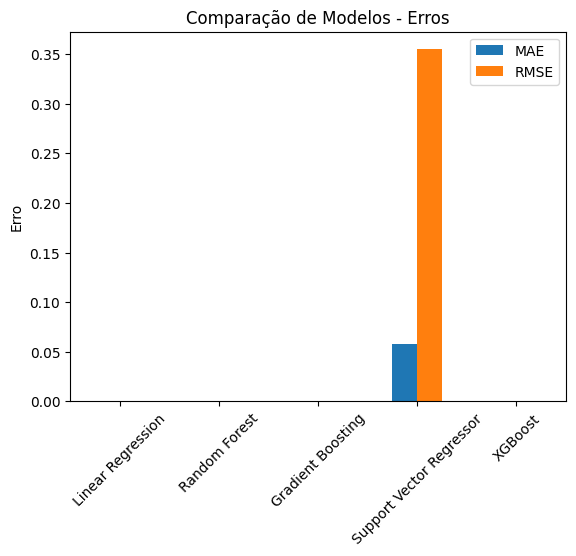


Resultados Finais dos Modelos:
                                   MAE          RMSE  R² Score
Linear Regression         3.760445e-16  5.406062e-16  1.000000
Random Forest             0.000000e+00  0.000000e+00  1.000000
Gradient Boosting         1.774176e-05  8.536322e-05  1.000000
Support Vector Regressor  5.807772e-02  3.548684e-01  0.902112
XGBoost                   2.418080e-06  1.180912e-05  1.000000


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = {}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R² Score': r2}

    print(f"\n{name}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

# Comparação visual dos resultados
results_df = pd.DataFrame(results).T

plt.figure(figsize=(12, 8))
results_df[['MAE', 'RMSE']].plot(kind='bar')
plt.title('Comparação de Modelos - Erros')
plt.ylabel('Erro')
plt.xticks(rotation=45)
plt.show()

print("\nResultados Finais dos Modelos:")
print(results_df)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(X_train.columns)

X_train['shipping_limit_date'] = pd.to_datetime(X_train['shipping_limit_date'], errors='coerce')

X_train['shipping_year'] = X_train['shipping_limit_date'].dt.year
X_train['shipping_month'] = X_train['shipping_limit_date'].dt.month
X_train['shipping_day'] = X_train['shipping_limit_date'].dt.day
X_train['shipping_weekday'] = X_train['shipping_limit_date'].dt.weekday  # Day of the week (0: Monday, 6: Sunday)

X_train = X_train.drop(columns=['shipping_limit_date'])

X_train = pd.get_dummies(X_train, drop_first=True)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)


print("Random Forest Results:")
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'R²: {rf_r2}')


Index(['order_item_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_id', 'order_status',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'year', 'month', 'day', 'day_of_week',
       'category_agro_industria_e_comercio', 'category_alimentos',
       'category_alimentos_bebidas', 'category_artes',
       'category_artes_e_artesanato', 'category_artigos_de_festas',
       'category_artigos_de_natal', 'category_audio', 'category_automotivo',
       'category_bebes', 'category_bebidas', 'category_beleza_saude',
       'category_brinquedos', 'category_cama_mesa_banho',
       'category_casa_conforto', 'category_casa_conforto_2',
       'category_casa_construcao', 'category_cds_dvds_musicais',
       'category_c

Orders:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00          

<ipython-input-9-14521d1fcb9e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
<ipython-input-9-14521d1fcb9e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['order_purchase_timestamp'].dt.month
<ipython-input-9-14521d1fcb9e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

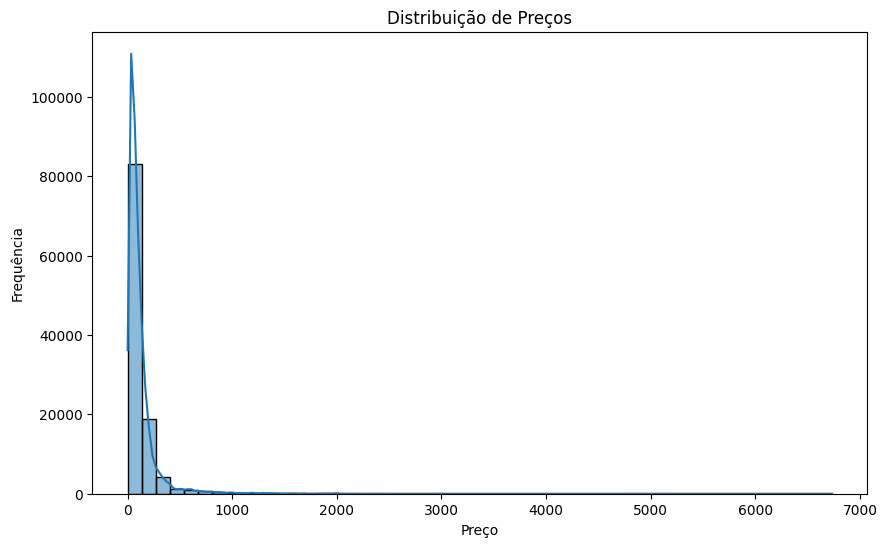

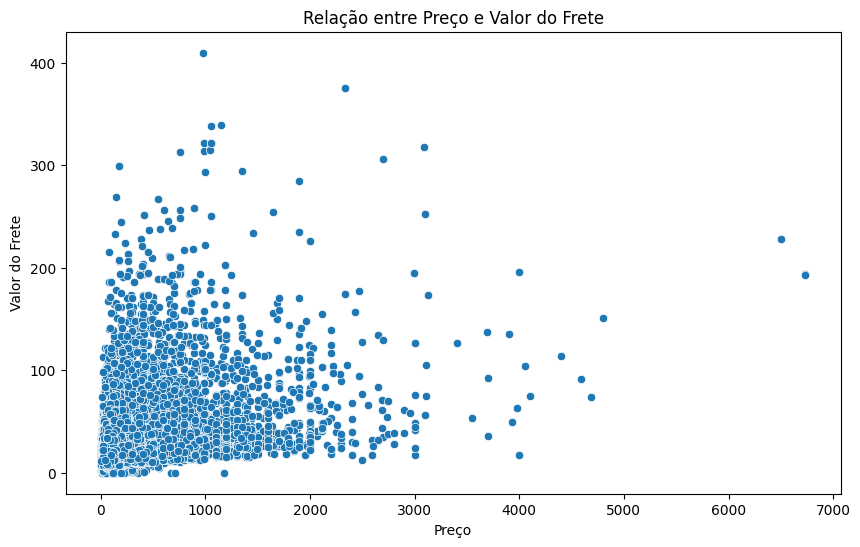

Linear Regression: {'MAE': 80.63179613917148, 'RMSE': 167.60063077269328, 'R²': 0.17413464677252555}
Random Forest: {'MAE': 59.514977604146125, 'RMSE': 162.29054567048698, 'R²': 0.22563736256108846}


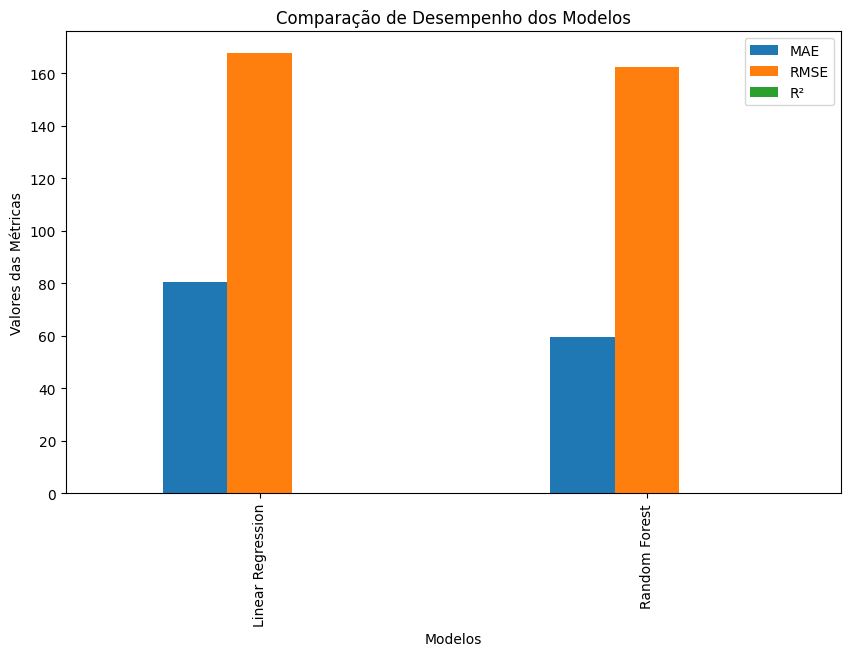

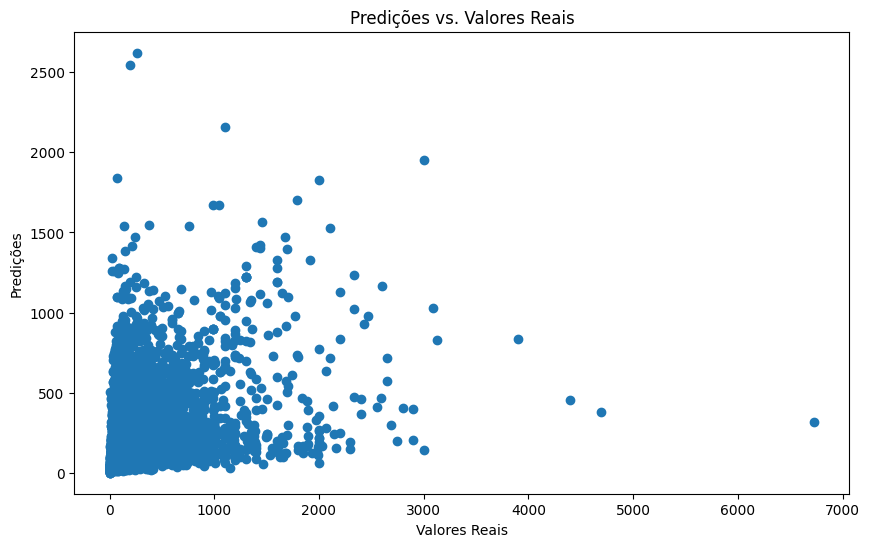

Modelo salvo como 'best_model.pkl'


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando os datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

# Visualizando as primeiras linhas de cada dataset
print("Orders:")
print(orders.head())
print("\nOrder Items:")
print(order_items.head())
print("\nProducts:")
print(products.head())

# Merge dos datasets
merged_data = pd.merge(order_items, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')

# Selecionando colunas relevantes
data = merged_data[['price', 'freight_value', 'order_purchase_timestamp', 'order_delivered_customer_date']]
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Criando novas variáveis
data['month'] = data['order_purchase_timestamp'].dt.month
data['year'] = data['order_purchase_timestamp'].dt.year

# Removendo valores nulos
data.dropna(inplace=True)

# Distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Relação entre preço e valor do frete
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price'], y=data['freight_value'])
plt.title('Relação entre Preço e Valor do Frete')
plt.xlabel('Preço')
plt.ylabel('Valor do Frete')
plt.show()

# Definindo variáveis preditoras (X) e variável-alvo (y)
X = data[['freight_value', 'month', 'year']]
y = data['price']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos candidatos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Testando e avaliando cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Mostrando resultados
for model, metrics in results.items():
    print(f"{model}: {metrics}")

# Resultados comparativos
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Desempenho dos Modelos')
plt.ylabel('Valores das Métricas')
plt.xlabel('Modelos')
plt.show()

# Escolha do melhor modelo
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Comparação de predições e valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.title('Predições vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.show()

# Salvar o modelo para uso futuro
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("Modelo salvo como 'best_model.pkl'")



**Objetivo**
O objetivo principal deste modelo preditivo é prever a demanda dos produtos da empresa e, com isso, otimizar os estoques. A flutuação de estoque pode ter um impacto significativo nos custos operacionais, além de afetar diretamente a satisfação do cliente. Se a demanda não for corretamente antecipada, podem ocorrer faltas de estoque, prejudicando a experiência do consumidor e, consequentemente, as vendas. Por outro lado, um excesso de estoque pode gerar custos adicionais com armazenamento e capital imobilizado.

**História**
Ao longo do tempo, a empresa vem lidando com a flutuação da demanda, o que pode causar desperdício de recursos e impactar negativamente a satisfação dos clientes. A precisão na previsão da demanda pode ajustar os estoques de forma mais eficiente, garantindo que a empresa tenha o produto certo disponível no momento certo, minimizando tanto a falta de estoque quanto o excesso de inventário. O modelo preditivo desenvolvido visa melhorar a tomada de decisão ao fornecer previsões mais precisas e oportunas sobre quais produtos terão maior demanda, ajudando a otimizar o processo logístico.

**Resultados**
Para avaliar os modelos que foram testados, é essencial focar na comparação entre eles em termos de suas métricas de desempenho.

**Próximos Passos**
O modelo preditivo desenvolvido pode ser implementado na prática para ajudar a otimizar a gestão de estoque da empresa. Após a implementação inicial, será fundamental realizar uma otimização contínua, atualizando o modelo com novos dados e ajustando seus parâmetros para garantir que ele permaneça preciso e eficaz ao longo do tempo.

Além disso, a empresa pode expandir a aplicação do modelo para outros aspectos da operação, como planejamento de marketing ou ajustes na precificação dos produtos, com base nas previsões de demanda.


